# Data Exploration

In [1]:
# libraries 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings                                                     
warnings.filterwarnings(action='ignore')

In [4]:
df = pd.read_csv('../data/train.csv')
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,15148661,4.499810,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,flexible,True,...,40.757349,-73.921339,Sunny Spacious Apt in Astoria w/ back yard access,Astoria,9,96.0,https://a0.muscache.com/im/pictures/3e40924b-7...,11101,1.0,1.0
1,1227528,3.970292,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Futon,strict,True,...,40.823556,-73.954573,Manhattan Sunny Private Room,Hamilton Heights,8,100.0,https://a0.muscache.com/im/pictures/2953dddd-0...,10031,1.0,1.0
2,15692740,4.787492,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",""Wheel...",4,1.0,Real Bed,moderate,True,...,40.689306,-73.955478,Sweet Apartment on Quiet Block,Bedford-Stuyvesant,12,100.0,NaN,11205,1.0,1.0
3,19115685,4.700480,Apartment,Entire home/apt,"{Internet,""Wireless Internet"",""Air conditionin...",3,NaN,Real Bed,moderate,False,...,40.681965,-73.965490,Husband & Wife Art-Filled Apartment,Clinton Hill,2,90.0,https://a0.muscache.com/im/pictures/81766960/b...,11238.0,1.0,1.0
4,2554110,5.192957,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",3,1.0,Real Bed,strict,True,...,40.742842,-73.957554,Luxurious 1 Bedroom Apt!,Long Island City,1,80.0,https://a0.muscache.com/im/pictures/0ed6ee9e-6...,11101,1.0,1.0


### We will first check the .info() to see what Dtypes we have

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59288 entries, 0 to 59287
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      59288 non-null  int64  
 1   log_price               59288 non-null  float64
 2   property_type           59288 non-null  object 
 3   room_type               59288 non-null  object 
 4   amenities               59288 non-null  object 
 5   accommodates            59288 non-null  int64  
 6   bathrooms               59139 non-null  float64
 7   bed_type                59288 non-null  object 
 8   cancellation_policy     59288 non-null  object 
 9   cleaning_fee            59288 non-null  bool   
 10  city                    59288 non-null  object 
 11  description             59288 non-null  object 
 12  first_review            46601 non-null  object 
 13  host_has_profile_pic    59148 non-null  object 
 14  host_identity_verified  59148 non-null

At first glance, there are many numeric columns that we can just leave like that unless there are many unique values (like id and latitude/longitude).

The categorical values will be analyzed to see if it is worth transforming to dummies or not.

### Check Correlation

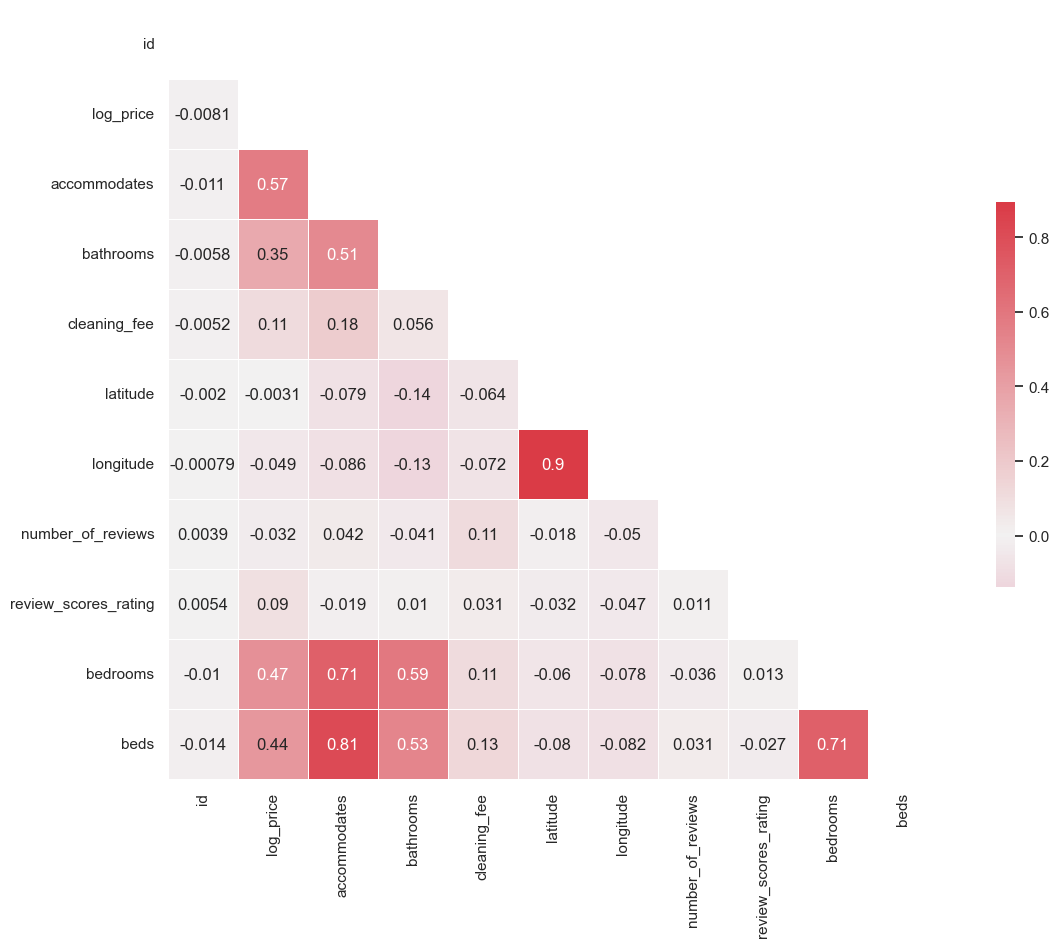

In [8]:
plt.figure(figsize=(15, 10))   

sns.set(style='white')

mask=np.triu(np.ones_like(df.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)

sns.heatmap(df.corr(),    
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

The only strong correlation is between longitude and latitude but since we were going to drop the we don't care.

### 'Bool' columns

In [10]:
# there are many columns with boolean values that are not actually boolean, like the following one

df.host_has_profile_pic.value_counts()

t    58969
f      179
Name: host_has_profile_pic, dtype: int64

also, as a costumer I don't look wether a bnb has the first comment from long ago or not, only
if they have comments, so we will change the first comment column to a boolean and drop the 
last comment column